# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress as st
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities n|ames
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | svencionys
Processing Record 7 of Set 1 | wesley
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | requena
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | trairi
Processing Record 13 of Set 1 | dandong
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | buala
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set

In [ ]:
print(json.dumps(city_weather, indent=4, sort_keys=True))

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,18.22,81,11,4.25,ZA,1669785111
1,guerrero negro,27.9769,-114.0611,15.13,76,48,4.13,MX,1669785111
2,east london,-33.0153,27.9116,23.52,78,0,2.06,ZA,1669785112
3,albany,42.6001,-73.9662,0.33,83,100,3.13,US,1669784816
4,ribeira grande,38.5167,-28.7000,14.87,91,73,1.79,PT,1669785112


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.22,81,11,4.25,ZA,1669785111
1,guerrero negro,27.9769,-114.0611,15.13,76,48,4.13,MX,1669785111
2,east london,-33.0153,27.9116,23.52,78,0,2.06,ZA,1669785112
3,albany,42.6001,-73.9662,0.33,83,100,3.13,US,1669784816
4,ribeira grande,38.5167,-28.7000,14.87,91,73,1.79,PT,1669785112


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

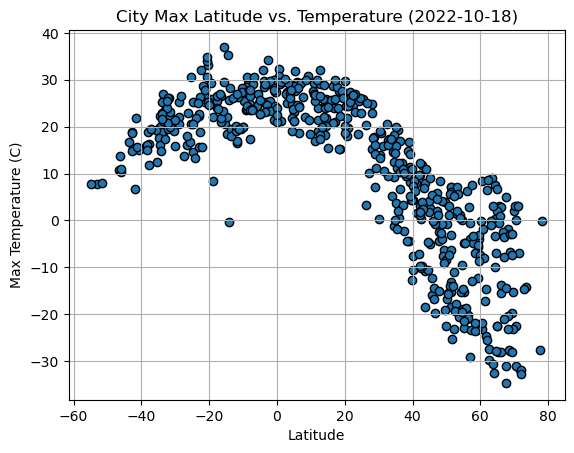

In [8]:
# Build scatter plot for latitude vs. temperature

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Max Temp']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
#plt.savefig("output_data/Fig1_JB.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

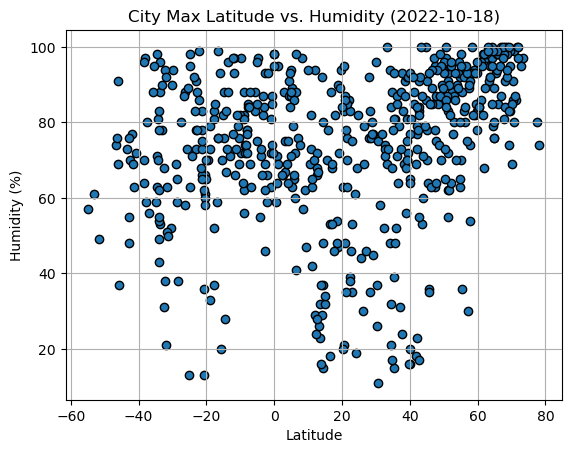

In [9]:
# Build the scatter plots for latitude vs. humidity

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Humidity']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

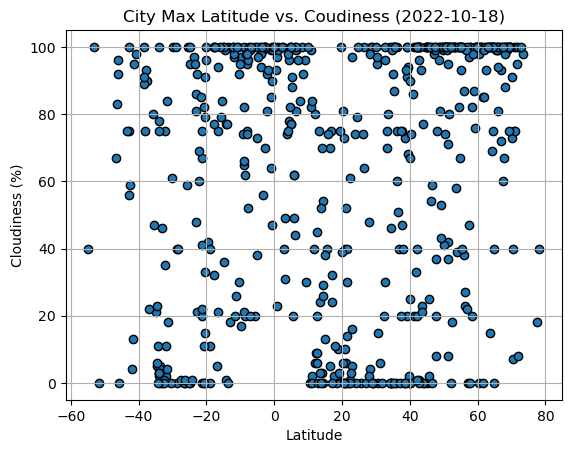

In [10]:
# Build the scatter plots for latitude vs. cloudiness

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Coudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

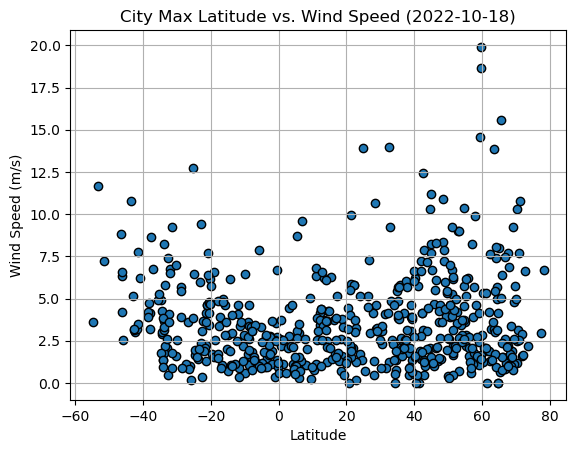

In [11]:
# Build the scatter plots for latitude vs. wind speed

#Define Axis
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

#Create Scatterplot
plt.scatter(x, y, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord):
  # Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
  slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
  regress_value = x_axis * slope + int
  line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

  #plt.clf()  #clear Pyplot figure

  # Plot scatter plot
  plt.scatter(x_axis,y_axis, color="blue")

  # Plot regression line
  plt.plot(x_axis,regress_value,"r-")
  plt.annotate(line_eq,(xcord,ycord),fontsize=15,color="red")

  # Label plot
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  # Print r square value
  print(f"R squared: {r**2}")

  # Show the graph that we have created
  plt.show()


In [12]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.22,81,11,4.25,ZA,1669785111
1,guerrero negro,27.9769,-114.0611,15.13,76,48,4.13,MX,1669785111
2,east london,-33.0153,27.9116,23.52,78,0,2.06,ZA,1669785112
3,albany,42.6001,-73.9662,0.33,83,100,3.13,US,1669784816
4,ribeira grande,38.5167,-28.7000,14.87,91,73,1.79,PT,1669785112


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,15.13,76,48,4.13,MX,1669785111
3,albany,42.6001,-73.9662,0.33,83,100,3.13,US,1669784816
4,ribeira grande,38.5167,-28.7000,14.87,91,73,1.79,PT,1669785112
5,svencionys,55.1500,26.1667,-4.73,98,93,2.18,LT,1669785112
6,wesley,15.5667,-61.3167,25.45,70,40,6.26,DM,1669785113


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.22,81,11,4.25,ZA,1669785111
2,east london,-33.0153,27.9116,23.52,78,0,2.06,ZA,1669785112
7,puerto ayora,-0.7393,-90.3518,21.42,87,47,3.58,EC,1669785113
10,busselton,-33.6500,115.3333,26.95,53,0,5.83,AU,1669785114
11,trairi,-3.2778,-39.2689,25.20,82,99,1.49,BR,1669784836


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7107401922062843


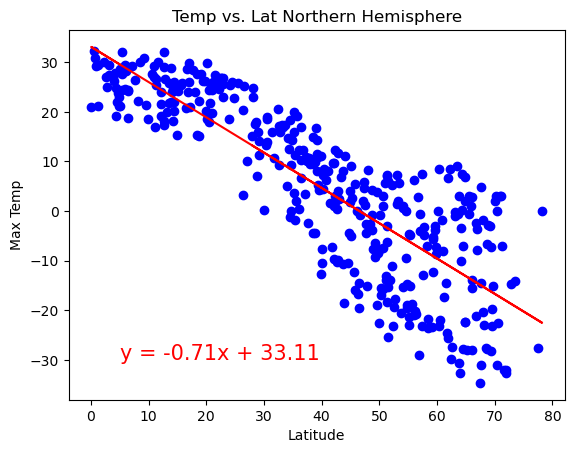

In [43]:
# Linear regression on Nothern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
title = "Temp vs. Lat Northern Hemisphere"
x_label = "Latitude"
y_label = "Max Temp"
#equation label position
xcord = 5
ycord = -30

#Can I use a param dictionary?
#best way to handle line annotation equation?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.34963291413561703


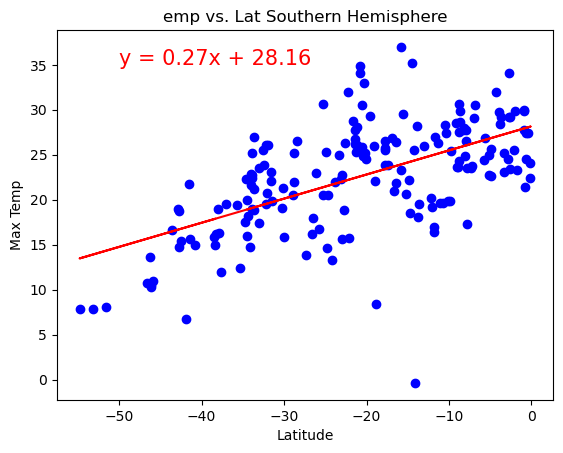

In [44]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
title = "emp vs. Lat Southern Hemisphere"
x_label = "Latitude"
y_label = "Max Temp"
#equation label position
xcord = -50
ycord = 35

#Can I use a param dictionary?
#best way to handle line annotation equation?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.17924403032878236


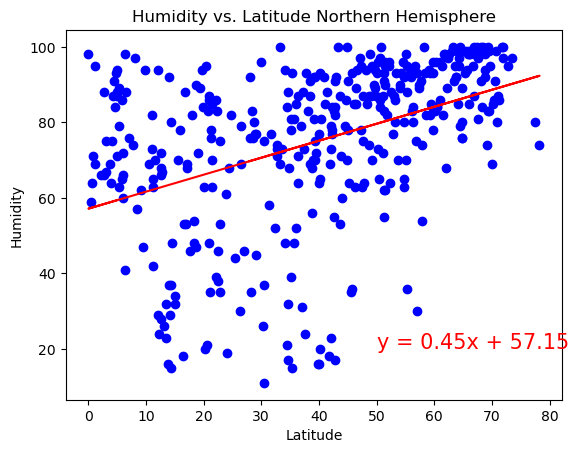

In [51]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
title = "Humidity vs. Latitude Northern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"
#equation label position
xcord = 50
ycord = 20

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.04266950573686777


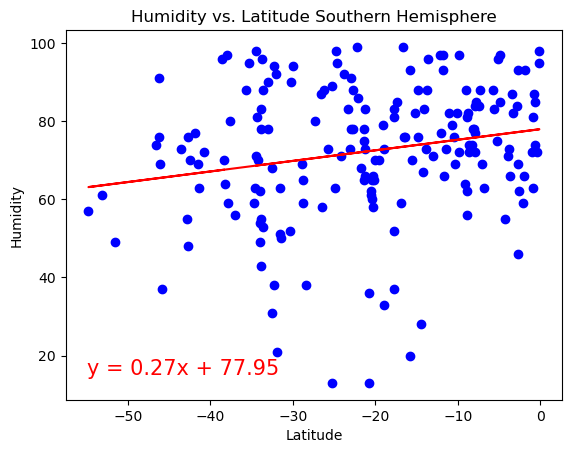

In [54]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
title = "Humidity vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"
#equation label position
xcord = -55
ycord = 15

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.08938875433182895


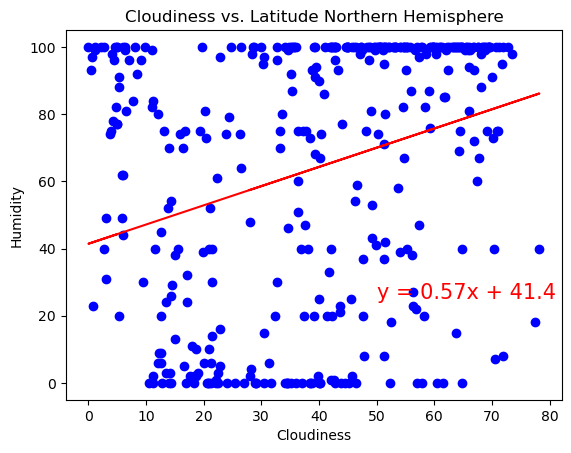

In [56]:
# Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
title = "Cloudiness vs. Latitude Northern Hemisphere"
x_label = "Cloudiness"
y_label = "Humidity"
#equation label position
xcord = 50
ycord = 25

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.08938875433182895


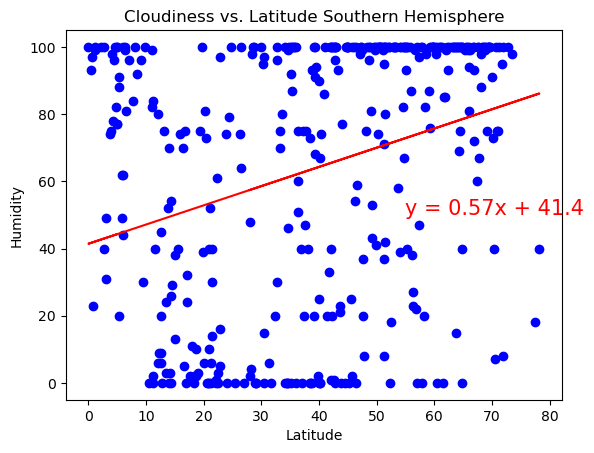

In [59]:
# Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
title = "Cloudiness vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Humidity"
#equation label position
xcord = 55
ycord = 50

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.029607398280371226


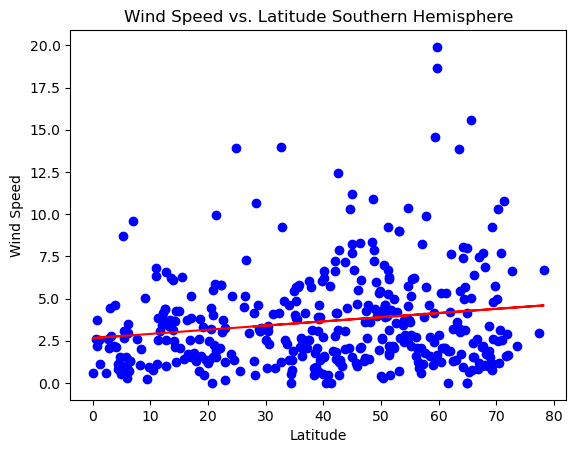

In [64]:
# Wind Speed  vs. Latitude Linear Regression Plot Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
title = "Wind Speed vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"
#equation label position
xcord = -55
ycord = 12

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

R squared: 0.1699606831541233


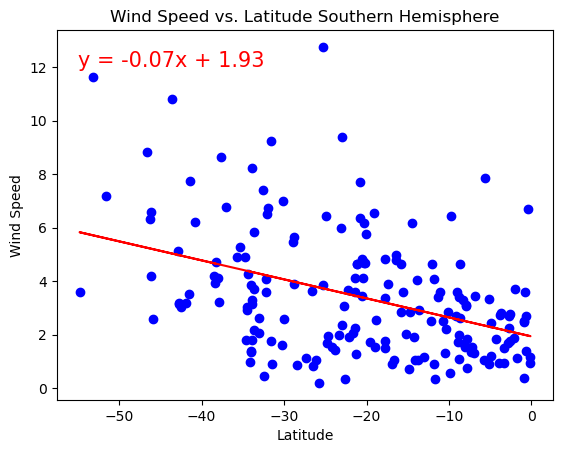

In [63]:
# Wind Speed  vs. Latitude Linear Regression Plot Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
title = "Wind Speed vs. Latitude Southern Hemisphere"
x_label = "Latitude"
y_label = "Wind Speed"
#equation label position
xcord = -55
ycord = 12

#Can I use a param dictionary?

regression_function(x_axis, y_axis, title, x_label, y_label, xcord, ycord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE